# Graph projection illustration

In [2]:
import os
os.chdir("..")

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_nodes_from(['Bank1','Bank2','Bank3','Bank4'], bipartite=0)
G.add_nodes_from(['Firm1','Firm2','Firm3', "Firm4"],bipartite=1)
G.add_edges_from([('Bank1', "Firm3"),('Bank4', "Firm4"),('Bank2', "Firm3"),('Bank2', "Firm4"),('Bank3', "Firm1"), ('Bank3', "Firm2"), ('Bank3', "Firm1"), ('Bank4', "Firm1"), ('Bank3', "Firm1"), ('Bank1', "Firm2")])


In [ ]:
pos = nx.drawing.layout.bipartite_layout(G, ['Bank1','Bank2','Bank3','Bank4'])

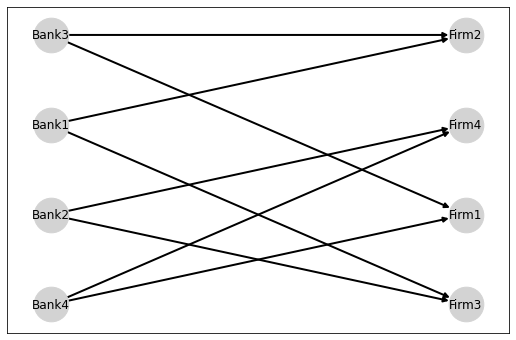

In [56]:
fig, ax = plt.subplots(figsize=(9,6), frameon=False)
nx.draw_networkx(G, pos=pos, width = 2, arrows=True, node_color="lightgrey", node_size=1200, ax=ax, font_color="black", font_size=12)
fig.savefig("plots/bipartite.png", bbox_inches='tight', pad_inches=-0.1, dpi=600)


In [38]:
projected = nx.projected_graph(G,['Firm1','Firm2','Firm3', 'Firm4'])

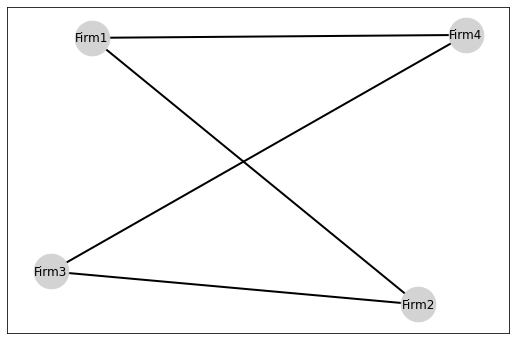

In [47]:
fig, ax = plt.subplots(figsize=(9,6),frameon=False)
nx.draw_networkx(projected, pos=nx.spring_layout(projected), width = 2, node_color="lightgrey", node_size=1200, ax=ax, font_color="black", font_size=12)


In [55]:
fig.savefig("plots/projected.png",bbox_inches='tight', pad_inches=-0.1,dpi=600)

# Descriptive tables on the sectors

In [1]:
from load.helpers import parse_yaml
import pandas as pd
config_dict = parse_yaml("config.yaml")

In [36]:
descriptive_table = pd.read_csv(config_dict['outputs']['descriptive_table'])
descriptive_table = descriptive_table.transpose()
print(descriptive_table.to_latex())

\begin{tabular}{lll}
\toprule
{} &         0 &         1 \\
\midrule
nodes                  &      7960 &      1901 \\
edges                  &    395713 &   1600903 \\
is\_directed            &      True &     False \\
is\_connected           &     False &     False \\
largest\_comp\_frac      &  0.002889 &  0.993688 \\
diameter\_of\_largest\_cc &         5 &         3 \\
clustering\_coefficient &   0.43315 &  0.000004 \\
\bottomrule
\end{tabular}



C:\Users\pipis\AppData\Local\Temp/ipykernel_12580/1174247830.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(descriptive_table.to_latex())


In [2]:
node_df = pd.read_csv(config_dict["data"]["node_path"])

In [12]:
max_assets = node_df[["assets", "sector"]].groupby("sector").max().reset_index()

In [25]:
largest_comps = max_assets.merge(node_df[["name", "assets", "sector"]], how="left", left_on=["assets", "sector"], right_on=["assets", "sector"])
largest_comps

,sector,assets,name
0,Communication Services,5.516220e+08,at_t
1,Consumer Discretionary,4.205490e+08,amazon
2,Consumer Staples,2.448600e+08,walmart
3,Energy,3.389230e+08,exxon_mobil
4,Financials,4.229166e+09,federal_national_mortgage_association
5,Health Care,2.329990e+08,cvs_health
6,Industrials,1.988740e+08,general_electric
7,Information Technology,3.648400e+08,microsoft
8,Materials,1.120040e+08,brookfield_property_partners_lp
9,Real Estate,6.988790e+07,american_tower


In [22]:
sector_analysis = pd.read_csv("data/outputs/sector_analysis_geom_weighted_cc.csv")

In [23]:
sector_analysis

,sector,nodes,total_sector_size,rel_sector_size,sector_clustering_coefficient,avg_clustering_coefficient,edge_ratio,equity_level
0,Information Technology,415,2.513528e+09,0.217027,0.000009,0.000006,0.221410,0.530571
1,Health Care,668,1.920807e+09,0.165849,0.000009,0.000003,0.349679,0.663703
2,Consumer Discretionary,216,1.662360e+09,0.143534,0.000034,0.000004,0.115730,0.442281
3,Industrials,243,1.408896e+09,0.121649,0.000170,0.000005,0.129000,0.481157
4,Communication Services,111,1.103980e+09,0.095322,0.000053,0.000005,0.058054,0.503285
5,Consumer Staples,60,7.858701e+08,0.067855,0.000906,0.000007,0.030317,0.449358
6,Materials,71,6.723184e+08,0.058050,0.002503,0.000006,0.037514,0.381397
7,Utilities,22,6.497101e+08,0.056098,0.005937,0.000009,0.011256,0.314330
8,Energy,47,5.678161e+08,0.049027,0.000648,0.000005,0.024603,0.509950
9,Real Estate,36,2.963425e+08,0.025587,0.002028,0.000006,0.019010,0.466112


In [30]:
output_df = sector_analysis[["sector", "nodes", "total_sector_size", "rel_sector_size"]].merge(largest_comps, how="left", left_on="sector", right_on="sector")
output_df = output_df[["sector", "nodes", "name", "total_sector_size", "rel_sector_size"]]

In [31]:
output_df["total_sector_size"] = output_df["total_sector_size"].astype('int64')
output_df

,sector,nodes,name,total_sector_size,rel_sector_size
0,Information Technology,415,microsoft,2.513528e+09,0.217027
1,Health Care,668,cvs_health,1.920807e+09,0.165849
2,Consumer Discretionary,216,amazon,1.662360e+09,0.143534
3,Industrials,243,general_electric,1.408896e+09,0.121649
4,Communication Services,111,at_t,1.103980e+09,0.095322
5,Consumer Staples,60,walmart,7.858701e+08,0.067855
6,Materials,71,brookfield_property_partners_lp,6.723184e+08,0.058050
7,Utilities,22,duke_energy,6.497101e+08,0.056098
8,Energy,47,exxon_mobil,5.678161e+08,0.049027
9,Real Estate,36,american_tower,2.963425e+08,0.025587


In [50]:
import numpy as np
np.cumsum(output_df.rel_sector_size)

0    0.217027
1    0.382877
2    0.526411
3    0.648060
4    0.743382
5    0.811237
6    0.869287
7    0.925385
8    0.974413
9    1.000000
Name: rel_sector_size, dtype: float64

In [49]:
print(output_df.to_latex(index=False, formatters={"rel_sector_size" : '{:,.2%}'.format}, column_format='lp{2.5cm}p{1.5cm}p{3.0cm}p{2.0cm}p{1.5cm}'))

\begin{tabular}{lp{2.5cm}p{1.5cm}p{3.0cm}p{2.0cm}p{1.5cm}}
\toprule
                sector &  nodes &                            name &  total\_sector\_size & rel\_sector\_size \\
\midrule
Information Technology &    415 &                       microsoft &         2513527660 &          21.70\% \\
           Health Care &    668 &                      cvs\_health &         1920806968 &          16.58\% \\
Consumer Discretionary &    216 &                          amazon &         1662360356 &          14.35\% \\
           Industrials &    243 &                general\_electric &         1408896045 &          12.16\% \\
Communication Services &    111 &                            at\_t &         1103979794 &           9.53\% \\
      Consumer Staples &     60 &                         walmart &          785870097 &           6.79\% \\
             Materials &     71 & brookfield\_property\_partners\_lp &          672318408 &           5.81\% \\
             Utilities &     22 &         

C:\Users\pipis\AppData\Local\Temp/ipykernel_15380/3767277963.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(output_df.to_latex(index=False, formatters={"rel_sector_size" : '{:,.2%}'.format}, column_format='lp{2.5cm}p{1.5cm}p{3.0cm}p{2.0cm}p{1.5cm}'))


In [12]:
sector_analysis2 = pd.read_csv(config_dict['outputs']['sector_analysis'])
sector_analysis_3 = pd.read_csv("data/outputs/sector_analysis_normal_cc.csv", sep=";")

In [13]:
sector_analysis_3

,sector,nodes,total_sector_size,rel_sector_size,sector_clustering_coefficient,avg_clustering_coefficient,edge_ratio,equity_level
0,Consumer Discretionary,216,2.513528e+09,0.217027,0.9673,0.97,0.12,0.44
1,Communication Services,111,1.920807e+09,0.165849,0.9660,0.97,0.06,0.50
2,Industrials,243,1.662360e+09,0.143534,0.9645,0.96,0.13,0.48
3,Health Care,668,1.408896e+09,0.121649,0.9724,0.98,0.35,0.66
4,Information Technology,415,1.103980e+09,0.095322,0.9792,0.97,0.22,0.53
5,Materials,71,7.858701e+08,0.067855,0.9546,0.96,0.04,0.38
6,Utilities,22,6.723184e+08,0.058050,0.9205,0.96,0.01,0.31
7,Consumer Staples,60,6.497101e+08,0.056098,0.9292,0.97,0.03,0.45
8,Energy,47,5.678161e+08,0.049027,0.9702,0.97,0.02,0.51
9,Real Estate,36,2.963425e+08,0.025587,0.9788,0.96,0.02,0.47


In [29]:
sector_output = sector_analysis2[['sector', 'sector_clustering_coefficient','edge_ratio', 'weighted_edge_ratio','equity_level']]
sector_output

,sector,sector_clustering_coefficient,edge_ratio,weighted_edge_ratio,equity_level
0,Information Technology,0.000130,0.221410,0.317833,0.530571
1,Health Care,0.000300,0.349679,0.210584,0.663703
2,Consumer Discretionary,0.000300,0.115730,0.105239,0.442281
3,Industrials,0.000753,0.129000,0.104077,0.481157
4,Communication Services,0.001759,0.058054,0.049334,0.503285
5,Consumer Staples,0.005697,0.030317,0.054073,0.449358
6,Materials,0.006842,0.037514,0.034495,0.381397
7,Utilities,0.021173,0.011256,0.015746,0.314330
8,Energy,0.006440,0.024603,0.027245,0.509950
9,Real Estate,0.010389,0.019010,0.083485,0.466112


In [30]:
sector_output = sector_output.merge(sector_analysis_3[['sector', 'sector_clustering_coefficient']], right_on ='sector', left_on='sector', how="left")
sector_output.columns = ['sector', 'weighted_cc', 'edge_ratio','weighted_edge_ratio', 'equity_level', 'clustering_coefficient']

In [32]:
sector_output = sector_output[['sector', 'clustering_coefficient', 'weighted_cc', 'edge_ratio','weighted_edge_ratio', 'equity_level']]

In [67]:
market_avg_equity = sum(sector_output.equity_level * sector_output.nodes)/sum(sector_output.nodes)
market_avg_equity

0.5471479735925014

In [33]:
sector_output

,sector,clustering_coefficient,weighted_cc,edge_ratio,weighted_edge_ratio,equity_level
0,Information Technology,0.9792,0.000130,0.221410,0.317833,0.530571
1,Health Care,0.9724,0.000300,0.349679,0.210584,0.663703
2,Consumer Discretionary,0.9673,0.000300,0.115730,0.105239,0.442281
3,Industrials,0.9645,0.000753,0.129000,0.104077,0.481157
4,Communication Services,0.9660,0.001759,0.058054,0.049334,0.503285
5,Consumer Staples,0.9292,0.005697,0.030317,0.054073,0.449358
6,Materials,0.9546,0.006842,0.037514,0.034495,0.381397
7,Utilities,0.9205,0.021173,0.011256,0.015746,0.314330
8,Energy,0.9702,0.006440,0.024603,0.027245,0.509950
9,Real Estate,0.9788,0.010389,0.019010,0.083485,0.466112


In [35]:
print(sector_output.to_latex(index=False, \
    formatters={"equity_level" : '{:,.2%}'.format, "clustering_coefficient": '{:.4f}'.format, "weighted_cc": '{:.4f}'.format,"edge_ratio": '{:.4f}'.format, "weighted_edge_ratio": '{:.4f}'.format},\
    column_format='lp{2.5cm}p{1.5cm}p{3.0cm}p{2.0cm}p{1.5cm}'))

\begin{tabular}{lp{2.5cm}p{1.5cm}p{3.0cm}p{2.0cm}p{1.5cm}}
\toprule
                sector & clustering\_coefficient & weighted\_cc & edge\_ratio & weighted\_edge\_ratio & equity\_level \\
\midrule
Information Technology &                 0.9792 &      0.0001 &     0.2214 &              0.3178 &       53.06\% \\
           Health Care &                 0.9724 &      0.0003 &     0.3497 &              0.2106 &       66.37\% \\
Consumer Discretionary &                 0.9673 &      0.0003 &     0.1157 &              0.1052 &       44.23\% \\
           Industrials &                 0.9645 &      0.0008 &     0.1290 &              0.1041 &       48.12\% \\
Communication Services &                 0.9660 &      0.0018 &     0.0581 &              0.0493 &       50.33\% \\
      Consumer Staples &                 0.9292 &      0.0057 &     0.0303 &              0.0541 &       44.94\% \\
             Materials &                 0.9546 &      0.0068 &     0.0375 &              0.0345 &       3

C:\Users\pipis\AppData\Local\Temp/ipykernel_12580/3631356460.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sector_output.to_latex(index=False, \


In [ ]:
"""sectors = ["Information Technology","Health Care","Consumer Discretionary","Industrials","Communication Services","Consumer Staples","Materials","Utilities","Energy","Real Estate"]
sector_analysis = sector_analysis.sort_values("total_sector_size", ascending=False)
sector_analysis['sector'] = sectors

sector_analysis = sector_analysis[['sector','nodes', 'total_sector_size', 'rel_sector_size',
       'sector_clustering_coefficient',
       'edge_ratio', 'weighted_edge_ratio','equity_level']]"""

# Summary table on largest influence on the sectors

In [2]:
from graph.describe import create_largest_influence_table

In [3]:
largest_influence_df = create_largest_influence_table(config_dict["output_map"], config_dict["outputs"]["simulations"], config_dict["lists"]["sectors"])

In [4]:
largest_influence_df = largest_influence_df.reset_index(names="target sector")

In [5]:
largest_influence_df.to_csv(f"{config_dict['data']['data_folder']}largest_influence_sectors.csv", index=False)

In [12]:
print(largest_influence_df[['target sector','alpha_13_h00','alpha_13_h03','alpha_13_h05' ,'alpha_13_h06']].sort_values("target sector").to_latex(index=False))

\begin{tabular}{lllll}
\toprule
         target sector &           alpha\_13\_h00 &           alpha\_13\_h03 &           alpha\_13\_h05 &           alpha\_13\_h06 \\
\midrule
Communication Services &            Health Care &            Health Care & Information Technology & Information Technology \\
Consumer Discretionary & Information Technology & Information Technology & Information Technology & Information Technology \\
      Consumer Staples & Information Technology & Information Technology & Information Technology & Information Technology \\
                Energy & Information Technology & Information Technology & Information Technology & Information Technology \\
           Health Care & Information Technology & Information Technology & Information Technology & Information Technology \\
           Industrials & Information Technology & Information Technology & Information Technology & Information Technology \\
Information Technology & Consumer Discretionary & Consumer Discretion

C:\Users\pipis\AppData\Local\Temp/ipykernel_15460/2525064486.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(largest_influence_df[['target sector','alpha_13_h00','alpha_13_h03','alpha_13_h05' ,'alpha_13_h06']].sort_values("target sector").to_latex(index=False))


In [8]:
largest_influence_df.sort_values("target sector")

,target sector,alpha_07_h00,alpha_07_h03,alpha_07_h05,alpha_07_h06,alpha_13_h00,alpha_13_h03,alpha_13_h05,alpha_13_h06
9,Communication Services,Health Care,Information Technology,Information Technology,Health Care,Health Care,Health Care,Information Technology,Information Technology
0,Consumer Discretionary,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
1,Consumer Staples,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
2,Energy,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
3,Health Care,Information Technology,Information Technology,Information Technology,Industrials,Information Technology,Information Technology,Information Technology,Information Technology
4,Industrials,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
5,Information Technology,Health Care,Health Care,Health Care,Health Care,Consumer Discretionary,Consumer Discretionary,Health Care,Health Care
6,Materials,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
7,Real Estate,Health Care,Health Care,Information Technology,Health Care,Health Care,Consumer Discretionary,Information Technology,Information Technology
8,Utilities,Information Technology,Information Technology,Information Technology,Health Care,Information Technology,Information Technology,Information Technology,Information Technology
